In [32]:
import tensorflow as tf
import os 
import cv2
import imghdr
from matplotlib import pyplot as plt 
import numpy as np  

In [33]:
# limits memory use and prevents OOM errors

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



In [34]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [35]:
# removes any uncompatable images

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in image_exts: {image_path}') 
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with {image_path}') 

                


Found 102 files belonging to 2 classes.


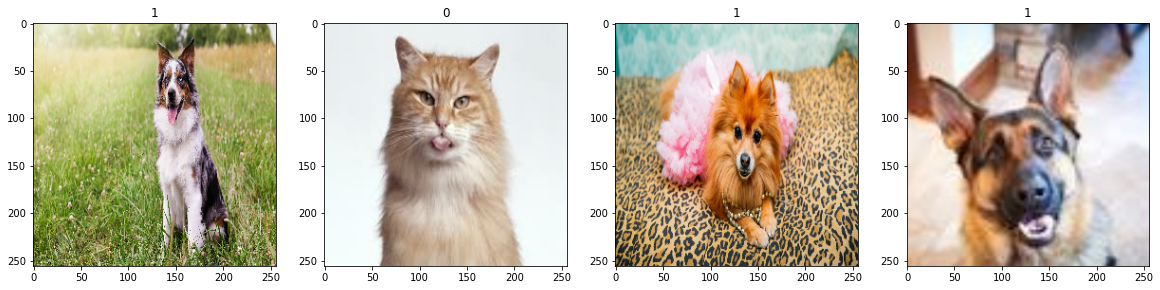

In [36]:
# load images using keras dataset (Class 1 = Dogs) (Class 0 = Cats)

data = tf.keras.utils.image_dataset_from_directory('data') 

data_iterator = data.as_numpy_iterator() #create a data iterator
batch = data_iterator.next() # get a batch from the iterator

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [41]:
# scale data into easier to compute formats

data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

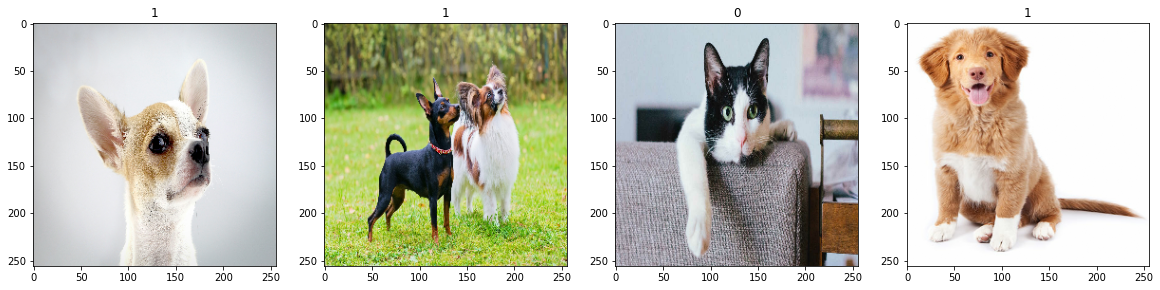

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [53]:
# split data into training and testing

train_size = int(len(data)*.7) # 4 batches in total (2 train, 1 val and test)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

1